<center><b><h1>Pandas Library<h5>$pip install pandas [or] !pip install pandas</h5></h1></b></center>


### (1) Creating Series & dataframes

In [1]:
import pandas as pd


In [2]:
import pandas as pd
ss = pd.Series([1,2,3,4,5])
ss
print(type(ss))

<class 'pandas.core.series.Series'>


### (2) Series with customized index

In [7]:
ss = pd.Series([1,2,2,2,3,3,4,4,5], name='Marks')
#print(ss)
ss.duplicated()

0    False
1    False
2     True
3     True
4    False
5     True
6    False
7     True
8    False
Name: Marks, dtype: bool

### (3) Basic Mathematical operations on searies

In [11]:
#ss[1:5]
# ss + 2
# ss * 2
# ss + ss
ss.loc[11:33]
# ss.head()
# ss

Series([], Name: Marks, dtype: int64)

### (4) Creating a dataframe with multiple series

In [12]:
import pandas as pd
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
purchases = pd.DataFrame(data)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


### (5) Customize index and locate customer Order

In [13]:
purchases = pd.DataFrame(data, index=['Mick', 'Robert', 'Lily', 'David'])
print(purchases,"\n")
print('~~~Customer order:~~~')
print(purchases.loc['Mick'])
# purchases.loc()

        apples  oranges
Mick         3        0
Robert       2        3
Lily         0        7
David        1        2 

~~~Customer order:~~~
apples     3
oranges    0
Name: Mick, dtype: int64


### (6) Reading data from the csv file

In [ ]:
df = pd.read_csv('city_temperatures.csv')
print(df)

In [18]:
df = pd.read_csv('city_temperatures.csv', index_col=0)
print(df)
# TempData = pd.read_csv("city_temperatures.csv", index_col=1)
# print(TempData)

           Temp
City           
Delhi        32
Mumbai       28
Kolkata      30
Chennai      35
Bangalore    25


### (7) Viewing specified number of rows using head() function

In [21]:
# df.head(4)
TempData.head(3)

,City,Temp
0,Delhi,32
1,Mumbai,28
2,Kolkata,30


### (8) To view last 'N' rows using tail() function 

In [ ]:
TempData.tail(2)

### (9) print information about a DataFrame - The index dtype and columns, non-null values and memory usage.

In [15]:
TempData = pd.read_csv("city_temperatures.csv")
print('~~~~~~~~Base Data~~~~')
print(TempData)
TempData.info()

~~~~~~~~Base Data~~~~
        City   Temp
0      Delhi     32
1     Mumbai     28
2    Kolkata     30
3    Chennai     35
4  Bangalore     25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    5 non-null      object
 1    Temp   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


### (10) The dimensionality of the DataFrame

In [16]:
TempData.shape

(5, 2)

### (11) Handling duplicates --> Return boolean Series denoting duplicate rows.

In [30]:
Empdf = pd.DataFrame({
     'name': ['Vinay', 'Vivek', 'Vinay', 'Vinod', 'Vinay'],
     'age': [25, 28, 25, 30, 25],
     'salary': [50000, 60000, 50000, 70000, 50000]
})
# Empdf = pd.concat([Empdf,Empdf])
print(Empdf,"\n")
print("Duplicate elements")
# Empdf.duplicated()
# print(Empdf.drop_duplicates()) #To drop the duplicate rows
firstrow = Empdf.duplicated(keep = 'first')
firstrow
# duplicates=Empdf[firstrow]
# print(duplicates)
#inplace=False: The method creates a modified copy of the object and returns it, leaving the original object unchanged. 
#inplace=True: The method modifies the original object directly, without returning anything (None is returned).
# print(Empdf.drop_duplicates(inplace=False))
# Empdf

    name  age  salary
0  Vinay   25   50000
1  Vivek   28   60000
2  Vinay   25   50000
3  Vinod   30   70000
4  Vinay   25   50000 

Duplicate elements
    name  age  salary
2  Vinay   25   50000
4  Vinay   25   50000


### (12) To find duplicates on specific column(s)->use subset.

In [ ]:
# Empdf.duplicated(subset=['salary'])
# Empdf.duplicated(subset=['age'])
# Empdf.duplicated(subset=['name'])

### (13) Customize the required duplicate row with argument keep : {'first', 'last', False}, default 'first' Determines which duplicates (if any) to mark.

In [ ]:
print(Empdf)
print('Keeping required duplicate element\n')
firstrow = Empdf.duplicated(keep='first')
# lastrow = Empdf.duplicated(keep='last')

print('--After data manipulation--')
print(lastrow)

### (14) Read data from JSON file

In [ ]:
moviesDF = pd.read_json('TopRatedMovies.json')
# print(moviesDF)
# moviesDF.head(3)
# moviesDF.info()
# moviesDF.shape

In [ ]:
 #ignore_index is used to set or reset index values of indivisual series
tempDF = pd.concat([moviesDF, moviesDF], ignore_index = False)
tempDF
# tempDF.duplicated(subset=['Title'])
# tempDF.shape

### (15) Column cleanup

### (i) Print all the column names as a list

In [ ]:
moviesDF.columns

In [ ]:
# Rename the columns by passing renamed column headers as a dictionary object.
moviesDF.rename(columns={'Title':'Cinema_Title', 
                        'Genre':'Movie_Type',
                        'Release_year': 'Year_of_Release',
                        'Rating':'Feedback'})
print('Without casing')
print(moviesDF.columns)
print('With casing')
moviesDF.columns = [col.upper() for col in moviesDF]   #can also use lowercase - col.lower() or col.upper()
print(moviesDF)

### (16) Working with missing values - None or NaN or NaT

In [5]:
import numpy as np
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                  "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
print(df)
# Drop the rows where at least one element is missing.
# df.dropna()
# Drop the columns where at least one element is missing.
df.dropna(axis='columns')
# Drop the rows where all elements are missing.
df.dropna(how='all')

       name        toy       born
0    Alfred        NaN        NaT
1    Batman  Batmobile 1940-04-25
2  Catwoman   Bullwhip        NaT


,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [7]:
movieDB = pd.read_csv('IMDB-Movie-Data.csv') # can also use argument index_col making specific col as index
movieDB

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [8]:
# isnull()  - returns a DataFrame where each cell is either True or False depending on that cell's null status.
# returns a data frame of the same size with the values masked as True for NA values and False for non-NA values.
# movieDB.isnull() #can also try for isna()
movieDB.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

### (17) Removing null values
### df.drop('column_name', axis=1): Drops a column.
### df.drop(index_name, axis=0): Drops a row.

In [ ]:
# delete any row with at least a single null value, but it will return a new DataFrame without altering the original one.
Mdb = movieDB.dropna()
# Mdb
# movieDB.drop('Title', axis=1)
movieDB.drop(1, axis=0)
# movieDB

### (18) <b>Handling missing values:</b> A technique used for replacing the missing data with some substitute values to retain most of the data/information of the dataset. These values can be either the <b><u>average</u></b> of values in the dataset or the value with <b><u>maximum</u></b> frequency etc.

### Functions: Pandas provides several functions to handle missing data:
### (I) <b>isna()</b> or <b>isnull()</b>: Checks if a value is NA.
### (II) <b>dropna()</b>: Drops rows or columns containing NA values.
### (III) <b>fillna()</b>: Fills NA values with a specified value.

In [ ]:
import pandas as pd
# import numpy as np
#Creating a dataframe
df = pd.DataFrame({"Value_1":[None, 14, 35, None, 1,12, 74, 65, None, 1],
                   "Value_2":[None, 24, 54, 3, None,None, 2, 54, 3, None],
                   "Value_3":[20, 16, None, 3, 8,None, 2, 54, 3, None],
                   "Value_4":[None, 2, 54, 3, None,14, 3, None, None, 6]})

# print(df)
df.head()

In [ ]:
df=df.astype({
    "Value_1": pd.Int64Dtype(),
    "Value_2": pd.Int64Dtype(),
    "Value_3": pd.Int64Dtype(),
    "Value_4": pd.Int64Dtype()
})

print(df)

### Fill missed columns with Mean value

In [ ]:
# df_Fdata=df
#Fill the missing value with average values in column Value1.
# df_Fdata['Value_1'].fillna(int(df_Fdata['Value_1'].mean()))
# n : int, default 5 ; Number of rows to select.
# df_Fdata.head()
df_Fdata.mean(axis=0)
# df_Fdata(['Value_1']).mean()

### Fill missed columns with Median value

In [ ]:
df_mdn=df
#Fill the missing values with the median value
df_mdn['Value_2'].fillna(df_mdn['Value_2'].median(), inplace = True)
#By default head() function will return first 5 rows from the dataset
df_mdn.head()

### Fill missed columns with Mode value - This technique involves replacing the missing values with the highest frequency values of the row or column we are dealing with.

In [ ]:
print(df)
df_md=df
#Filling the missing value with the maximum frequency element 
df_md['Value_3'].fillna(df_md['Value_3'].mode(), inplace = True)
df_md.head(6)

### (19) DataFrame slicing, selecting, extracting

In [ ]:
movieDB
# genre_col = movieDB['Genre']
# print(genre_col)
# type(genre_col)

In [ ]:
subset = movieDB[['Genre', 'Rating']]

subset.head()

### By column heading as indexing

In [ ]:
import pandas as pd
ValuesDF = pd.DataFrame({"Value_1":[None, 14, 35, None, 1,12, 74, 65, None, 1],
                   "Value_2":[None, 24, 54, 3, None,None, 2, 54, 3, None],
                   "Value_3":[20, 16, None, 3, 8,None, 2, 54, 3, None],
                   "Value_4":[None, 2, 54, 3, None,14, 3, None, None, 6]})

In [ ]:
ValuesDF
ValuesDF[['Value_3']]

In [ ]:
colVal = ValuesDF[['Value_3', 'Value_4']]
colVal

### By rows indexing
### .loc - locates by name (Access a group of rows and columns by label(s) or a boolean array.)
### .iloc- locates by numerical index (Purely integer-location based indexing for selection by position.)

In [ ]:
print(ValuesDF)
# bylocIndx = ValuesDF.loc[3,'Value_3']
# bylocIndx_Slicing = ValuesDF.loc[0:3,['Value_1','Value_3']]
bylocIndx_Slicing = ValuesDF.loc[0:2,['Value_3']]
# bylocIndx
bylocIndx_Slicing

In [ ]:
print(ValuesDF)
bylocIndx = ValuesDF.iloc[:,[0,2]]
bylocIndx

### (20) Understanding your variables - Using describe() on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [ ]:
movieDB.describe()

In [ ]:
movieDB['Metascore'].describe

### .value_counts() can tell us the frequency of all values in a column:

In [ ]:
movieDB['Metascore'].value_counts().head(10)

In [ ]:
movieDB['Rating'].value_counts().head()

#### (21) DataFrame slicing, selecting, extracting

### By column

In [ ]:
# type(movieDB['Rating'])
type(movieDB[['Rating']])

In [ ]:
movieDB.loc[0:2,['Rating']]

### By rows - iloc[] used to filter the data based on the row index

In [ ]:
movieDB.iloc[999]

### (21) Conditional selections

In [85]:
moviesDF = pd.read_json('TopRatedMovies.json')
moviesDF

,Title,Genre,Release_year,Rating
0,Pathaan,Action,2023,4.5
1,RRR,Action,2022,4.8
2,Kantara,"Action, Drama",2022,4.7
3,Pushpa: The Rise,"Action, Drama",2021,4.3
4,Vikram Vedha,"Action, Thriller",2022,4.2


In [84]:
# movieList = (moviesDF['Title'] == 'Pathaan')
movieList
# moviesDF[moviesDF['Rating']==4.7]
# moviesDF[moviesDF['Rating']<4.7].head(2)
# moviesDF[(moviesDF['Release_year']==2022) | (moviesDF['Rating']==4.7)]

0     True
1    False
2    False
3    False
4    False
Name: Title, dtype: bool

In [93]:
movies_df = pd.read_csv('IMDB-Movie-Data.csv')
# movies_df.head(2)
# movies_df == 'James Gunn'
movies_df[movies_df == 'James Gunn']
movies_df[movies_df == 'James Gunn']['Actors']
# movies_df[
#     ((movies_df['Year'] >= 2005) & (movies_df['Year'] <= 2010))
#     & (movies_df['Rating'] > 8.0)
#     & (movies_df['Revenue'] < movies_df['Revenue'].quantile(0.25))
# ]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
995    NaN
996    NaN
997    NaN
998    NaN
999    NaN
Name: Actors, Length: 1000, dtype: object

### (22) Plotting

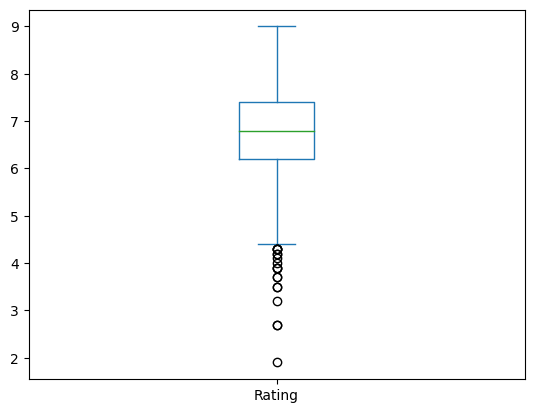

In [82]:
movies_df.shape
# movies_df.plot(kind='scatter', x='Rating', y='Revenue (Millions)', title='Revenue (millions) vs Rating')
# movies_df['Rating'].plot(kind='hist', title='Rating')
# movies_df['Rating'].describe()
movies_df['Rating'].plot(kind="box");